In [1]:
import requests
from bs4 import BeautifulSoup
import csv

# Menentukan URL awal yang akan di-scrape
web_url = 'https://www.bukalapak.com/c/sepeda/fullbike/bmx?page='

data = []

# Melakukan scraping dari halaman 1 hingga 5
for page in range(1, 6):
    url = web_url + str(page)
    req = requests.get(url)
    soup = BeautifulSoup(req.text, 'html.parser')
    product_items = soup.find_all('div', {'class': 'bl-product-card'})

    for item in product_items:
        # Mencari elemen-elemen dengan tag dan class yang sesuai
        name_elem = item.find('a', {'class': 'bl-link'})
        price_elem = item.find('p', {'class': 'bl-text bl-text--subheading-20 bl-text--semi-bold bl-text--ellipsis__1'})
        address_elem = item.find('span', {'class': 'mr-4 bl-product-card_location bl-text bl-text--body-14 bl-text--subdued bl-text--ellipsis_1'})
        rating_elem = item.find('p', {'class': 'bl-text bl-text--body-14 bl-text--subdued'})
        
        # Memastikan elemen-elemen yang ditemukan tidak None sebelum mengambil teksnya
        if name_elem and address_elem and price_elem and rating_elem:
            name = name_elem.text.strip()
            price = price_elem.text.strip()
            address = address_elem.text.strip()
            rating = rating_elem.text.strip()
            data.append([name, address, price, rating])

# Menentukan nama file CSV untuk menyimpan data
csv_file = 'data_prima.csv'

# Membuka file CSV dan menulis data ke dalamnya
with open(csv_file, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Name', 'Address', 'Price', 'Rating'])
    writer.writerows(data)

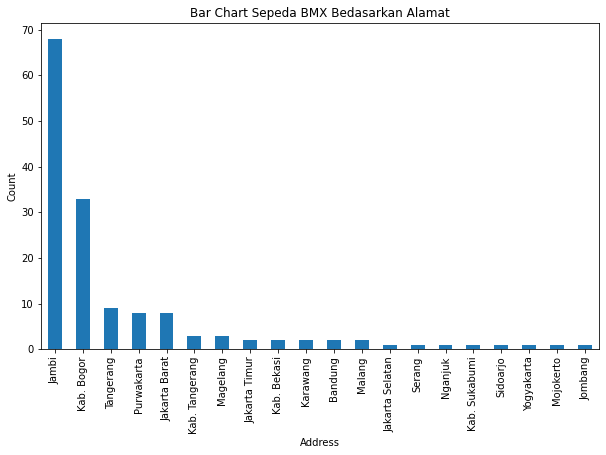

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# membaca file CSV menjadi DataFrame
data = pd.read_csv('data_prima.csv')

# Bar chart
plt.figure(figsize=(10, 6)) # mengatur ukuran gambar 10x6 inci menggunakan modul Matplotlib.
data['Address'].value_counts().plot(kind='bar') # Menghitung jumlah kemunculan tiap nilai dalam kolom 'Address'
plt.xlabel('Address') # melabeli sumbu x dengan teks 'Address'.
plt.ylabel('Count') # melabeli sumbu y dengan teks 'Count'.
plt.title('Bar Chart Sepeda BMX Bedasarkan Alamat') # membust judul grafik dengan teks .
plt.savefig('barchart_bmx.jpg') # Menyimpan chart dalam format JPG dengan nama file 'bar_chart.jpg'.
plt.show() # menampilkan chart

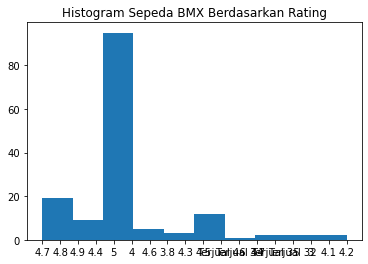

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
data = pd.read_csv("data_prima.csv")

# Menghitung jumlah kemunculan tiap nilai dalam kolom 'Rating'
plt.hist(data['Rating'])

# Menambahkan judul
plt.title("Histogram Sepeda BMX Berdasarkan Rating")

# Menyimpan Histogram dalam format JPG dengan nama file 'histogram.jpg'
plt.savefig('histogram_bmx.jpg', dpi=1000, bbox_inches='tight')

# Menampilkan Histogram
plt.show()